In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('seat_matrix.csv')

In [4]:
data.head()

,Institute Name,Program Name,State/All India Seats,Seat Pool,OPEN,OPEN-PwD,GEN-EWS,GEN-EWS-PwD,SC,SC-PwD,ST,ST-PwD,OBC-NCL,OBC-NCL-PwD,Total
0,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",All India,Gender-Neutral,22,1,5,0,9,1,3,0,14,1,56
1,Indian Institute of Technology Bhubaneswar,"Civil Engineering (4 Years, Bachelor of Techno...",All India,Female-only (including Supernumerary),5,0,1,0,1,0,1,0,4,0,12
2,Indian Institute of Technology Bhubaneswar,"Computer Science and Engineering (4 Years, Bac...",All India,Gender-Neutral,22,1,4,0,8,0,4,0,14,1,54
3,Indian Institute of Technology Bhubaneswar,"Computer Science and Engineering (4 Years, Bac...",All India,Female-only (including Supernumerary),5,1,1,0,2,0,1,0,4,0,14
4,Indian Institute of Technology Bhubaneswar,"Electrical Engineering (4 Years, Bachelor of T...",All India,Gender-Neutral,22,1,6,0,8,1,3,0,14,0,55


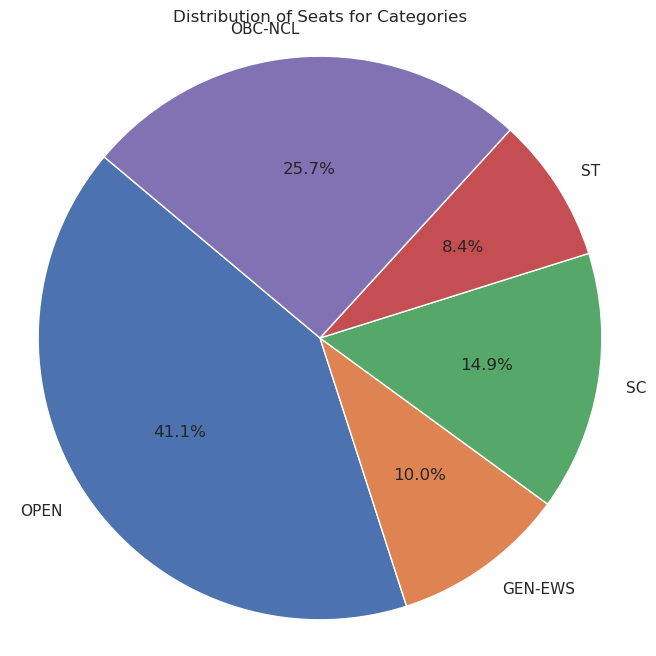

In [5]:
category_seats = data[['OPEN', 'GEN-EWS', 'SC', 'ST', 'OBC-NCL']].sum()

# Define labels for the pie chart
labels = category_seats.index

# Define sizes (seat counts) for each category
sizes = category_seats.values

# Create a pie chart using Seaborn
plt.figure(figsize=(8, 8))
sns.set()  # Set Seaborn's style
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Distribution of Seats for Categories')

# Display the pie chart
plt.show()

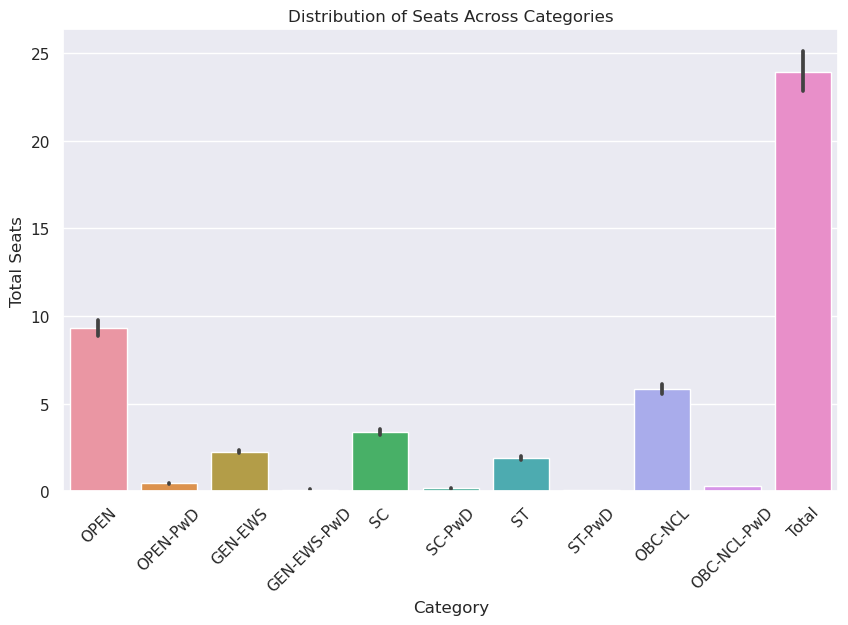

Summary Statistics:
              count       mean        std  min  25%   50%   75%    max
Category                                                              
GEN-EWS      2392.0   2.274247   2.642041  0.0  1.0   1.0   3.0   24.0
GEN-EWS-PwD  2392.0   0.109114   0.311847  0.0  0.0   0.0   0.0    1.0
OBC-NCL      2392.0   5.839465   7.126519  0.0  1.0   3.0   8.0   64.0
OBC-NCL-PwD  2392.0   0.303512   0.513983  0.0  0.0   0.0   1.0    4.0
OPEN         2392.0   9.343227  10.927257  0.0  2.0   5.0  14.0   98.0
OPEN-PwD     2392.0   0.474498   0.655206  0.0  0.0   0.0   1.0    5.0
SC           2392.0   3.385870   3.936066  0.0  1.0   2.0   5.0   36.0
SC-PwD       2392.0   0.174331   0.383857  0.0  0.0   0.0   0.0    2.0
ST           2392.0   1.901338   2.433105  0.0  0.0   1.0   3.0   28.0
ST-PwD       2392.0   0.087375   0.286850  0.0  0.0   0.0   0.0    2.0
Total        2392.0  23.892977  27.629491  0.0  6.0  13.0  34.0  250.0

Seat Pool Analysis:
Seat Pool
Gender-Neutral            

In [6]:
df = pd.read_csv('seat_matrix.csv')

# Create a new DataFrame to consolidate category data
category_data = pd.melt(df, id_vars=['Institute Name', 'Program Name', 'State/All India Seats', 'Seat Pool'],
                        var_name='Category', value_name='Seats')

# 1. Summary Statistics
summary_stats = category_data.groupby('Category')['Seats'].describe()

# 2. Visualization: Distribution of seats across categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Seats', data=category_data)
plt.title('Distribution of Seats Across Categories')
plt.xlabel('Category')
plt.ylabel('Total Seats')
plt.xticks(rotation=45)
plt.show()

# 3. Seat Pool Analysis
seat_pool_counts = category_data['Seat Pool'].value_counts()
seat_pool_percentage = seat_pool_counts / len(df) * 100

# 4. Category-wise Analysis
category_avg_seats = category_data.groupby('Category')['Seats'].mean()

# 5. Reserved Category Analysis (e.g., SC, ST, OBC-NCL)
reserved_categories = ['SC', 'ST', 'OBC-NCL']
reserved_category_seats = category_data[category_data['Category'].isin(reserved_categories)]
general_category_seats = category_data[~category_data['Category'].isin(reserved_categories)]

# 6. PwD Category Analysis (if applicable)
# Modify this section to include PwD categories if they are separate columns
# Example: pwd_category_avg_seats = category_data.groupby('PwD-Category')['Seats'].mean()

# 7. State-wise Analysis
# Filter out non-numeric values in 'State/All India Seats'
numeric_states = df[df['State/All India Seats'].str.isnumeric()]
state_avg_seats = numeric_states.groupby('State/All India Seats')['Total'].mean()

# 8. Trends Over Time (if applicable)
# You can use time-based data and appropriate plotting for this analysis.

# 9. Correlation Analysis (example: between 'Total' and 'State')
correlation = numeric_states[['Total', 'State/All India Seats']].astype(float).corr()

# 10. Top Institutions
top_institutions = df.nlargest(10, 'Total')

# Display or save results as needed
print("Summary Statistics:")
print(summary_stats)

print("\nSeat Pool Analysis:")
print(seat_pool_counts)
print("\nSeat Pool Percentage:")
print(seat_pool_percentage)

print("\nCategory-wise Analysis:")
print(category_avg_seats)

print("\nReserved Category Analysis:")
print(reserved_category_seats)
print(general_category_seats)

# 6. PwD Category Analysis (if applicable)
# Add code to analyze PwD categories here

print("\nState-wise Analysis:")
print(state_avg_seats)

print("\nCorrelation Analysis:")
print(correlation)

print("\nTop Institutions:")
print(top_institutions)

/tmp/ipykernel_27713/4203506723.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


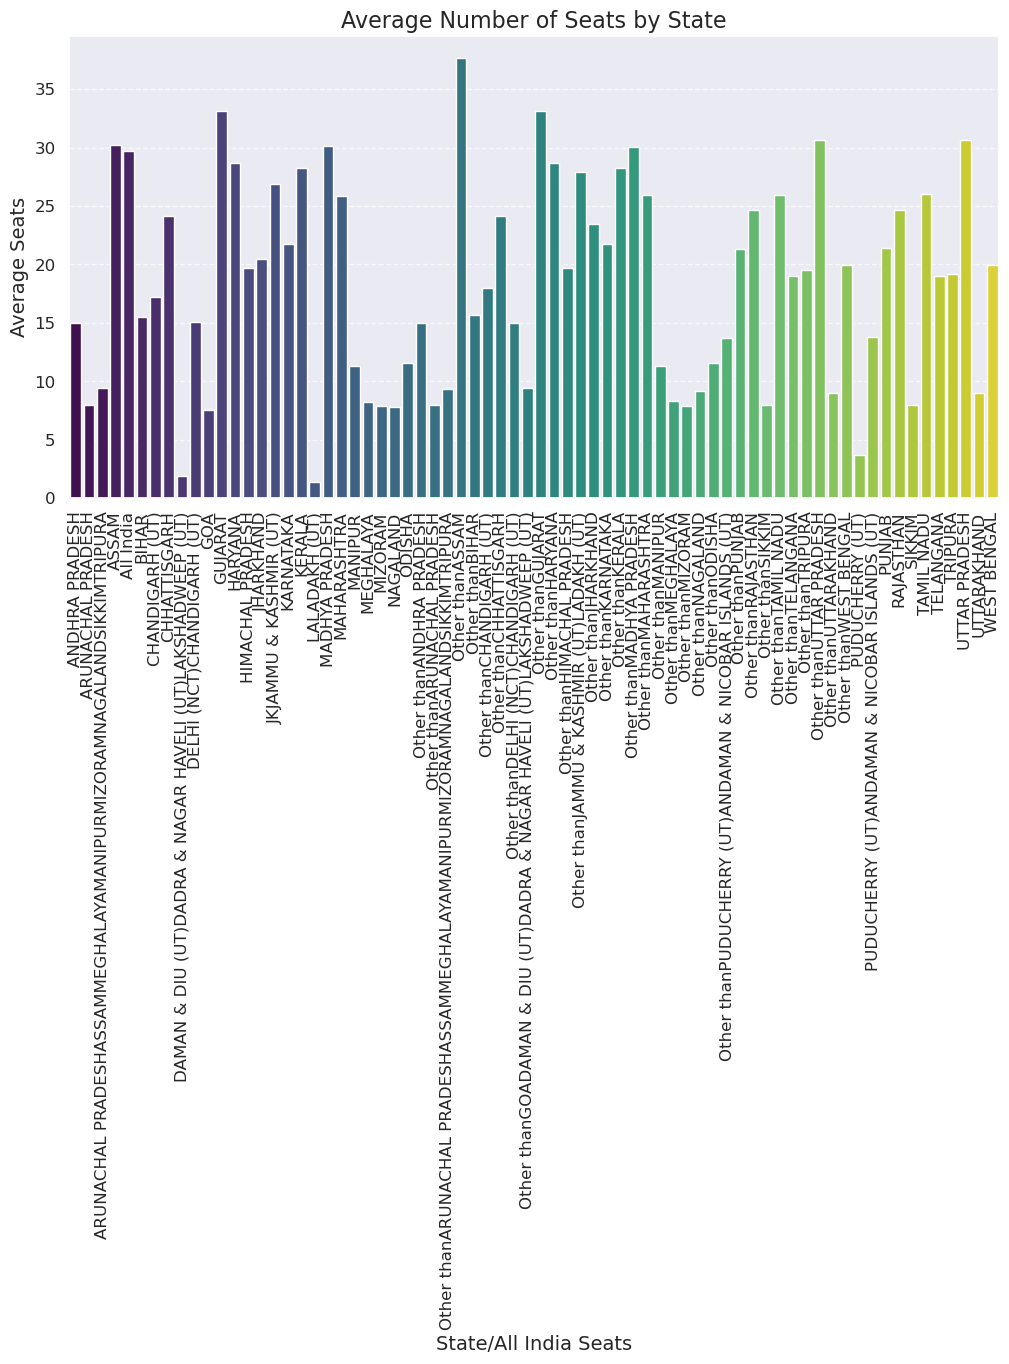

In [7]:
state_avg_seats = df.groupby('State/All India Seats')['Total'].mean().reset_index()

# Set a custom color palette for the plot
custom_palette = sns.color_palette('viridis', len(state_avg_seats))

# Create a more visually appealing bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State/All India Seats', y='Total', data=state_avg_seats, palette=custom_palette)

# Add titles and labels
plt.title('Average Number of Seats by State', fontsize=16)
plt.xlabel('State/All India Seats', fontsize=14)
plt.ylabel('Average Seats', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines to the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()

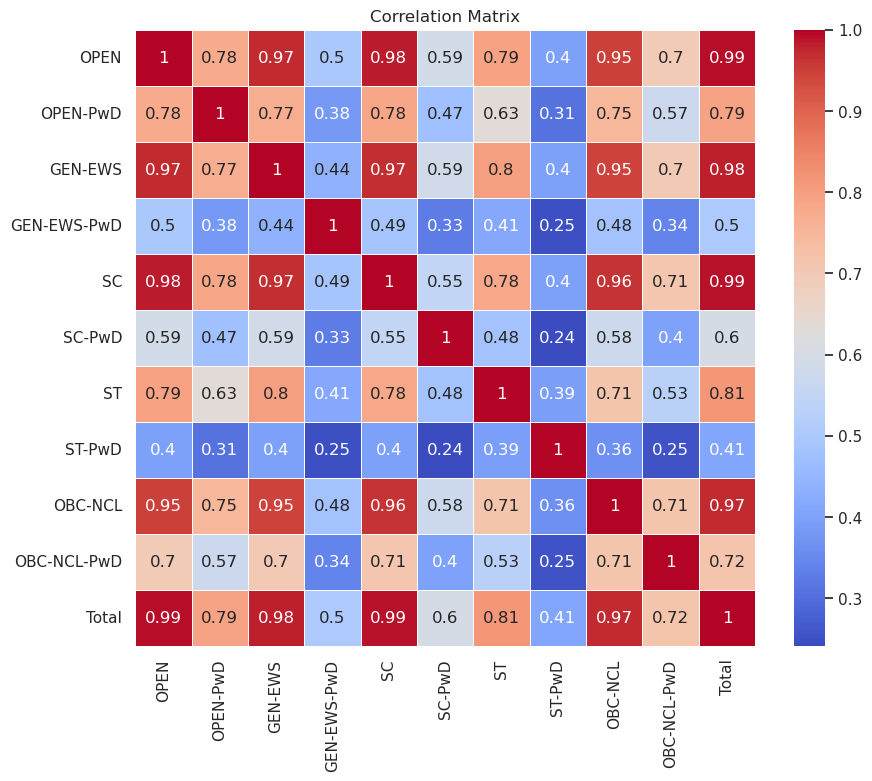

In [8]:
numeric_columns = df.select_dtypes(include=['number'])

# Calculate correlation coefficients
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

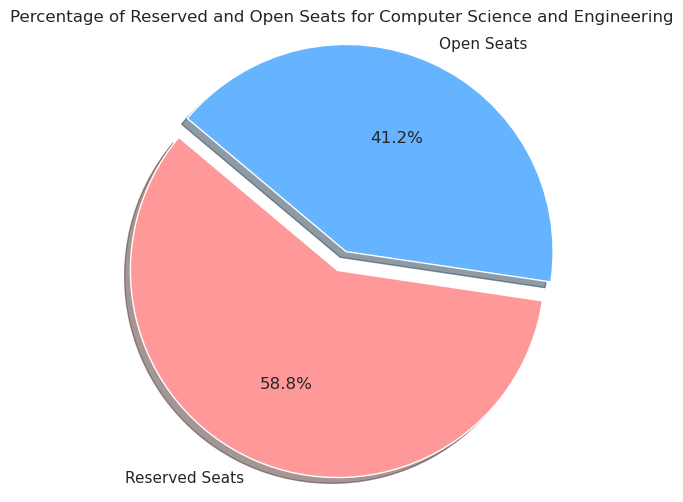

In [10]:
program_data = df[df['Program Name'] == 'Computer Science and Engineering (4 Years, Bachelor of Technology)']

# Calculate the percentage of reserved and open seats
reserved_seats = program_data['GEN-EWS'] + program_data['GEN-EWS-PwD'] + program_data['OBC-NCL'] + program_data['OBC-NCL-PwD'] + program_data['SC'] + program_data['SC-PwD'] + program_data['ST'] + program_data['ST-PwD']
open_seats = program_data['OPEN'] + program_data['OPEN-PwD']

# Create a pie chart
labels = ['Reserved Seats', 'Open Seats']
sizes = [reserved_seats.sum(), open_seats.sum()]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.title('Percentage of Reserved and Open Seats for Computer Science and Engineering')
plt.show()

47927
9225


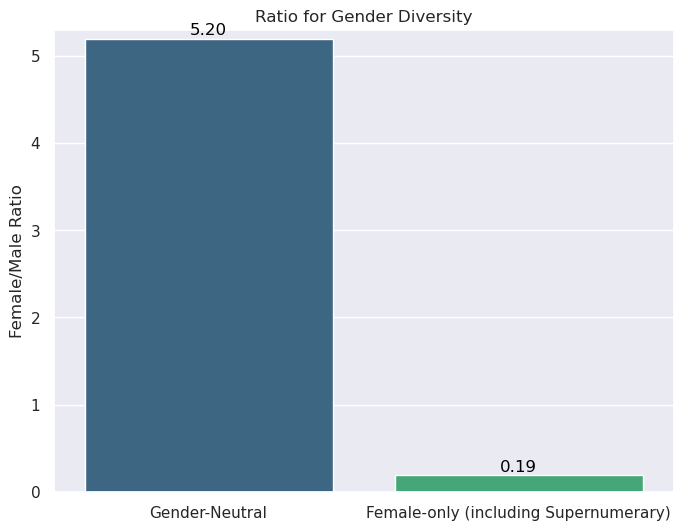

In [34]:
gender_neutral_seats = data[data['Seat Pool'] == 'Gender-Neutral']
female_only_supernumery = data[data['Seat Pool'] == 'Female-only (including Supernumerary)']

# Print the filtered DataFrame
print(gender_neutral_seats['Female'].sum())
print(female_only_supernumery['Female'].sum())

gender_neutral_ratio = gender_neutral_seats['Female'].sum() / female_only_supernumery['Female'].sum()

# Calculate the ratio of female to male for Female-only (including Supernumerary) seats
female_only_ratio = female_only_supernumery['Female'].sum() /  gender_neutral_seats['Female'].sum()

# Create a bar plot for the ratios
ratios = [gender_neutral_ratio, female_only_ratio]
categories = ['Gender-Neutral', 'Female-only (including Supernumerary)']

plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=ratios, palette='viridis')
plt.title('Ratio for Gender Diversity')
plt.ylabel('Female/Male Ratio')
plt.ylim(0, max(ratios) + 0.1)  # Set the y-axis limit for better visualization

# Display the ratio values on top of the bars
for i, ratio in enumerate(ratios):
    plt.text(i, ratio + 0.01, f'{ratio:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()
